In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
import matplotlib.dates as mdates
import nltk
from nltk.tokenize import word_tokenize

In [2]:
tweet2020 = pd.read_csv('tweets-2020-analiza.csv')
tweet2021 = pd.read_csv('tweets-2021-analiza.csv')

C:\Python39\lib\site-packages\IPython\core\interactiveshell.py:3457: DtypeWarning: Columns (0,2,3) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


In [5]:
tweet = pd.concat([tweet2021, tweet2020])
tweet.drop(345328, axis=0, inplace=True) 

In [6]:
tweet['date'] =  pd.to_datetime(tweet['date'])
tweet['date']

0         2022-03-31
1         2022-03-31
2         2022-03-31
3         2022-03-31
4         2022-03-31
             ...    
2465111   2019-12-29
2465112   2019-12-23
2465113   2019-12-23
2465114   2019-12-19
2465115   2019-12-15
Name: date, Length: 2882398, dtype: datetime64[ns]

In [7]:
tweet.Textblob_Polarity = tweet.Textblob_Polarity.astype(float)
tweet.Vader_Sentiment = tweet.Vader_Sentiment.astype(float)
tweet.Afinn_Sentiment = tweet.Afinn_Sentiment.astype(float)

In [5]:
tweet.likeCount = tweet.likeCount.astype('int')

In [6]:
tweet.likeCount.max()

865428

In [7]:
tweetText = tweet['Text']
tweetText.duplicated().sum()

317394

In [8]:
vader_counts = tweet.Vader_Analysis.value_counts()
afinn_counts = tweet.Afinn_Analysis.value_counts()
textblob_counts = tweet.Textblob_Analysis.value_counts()

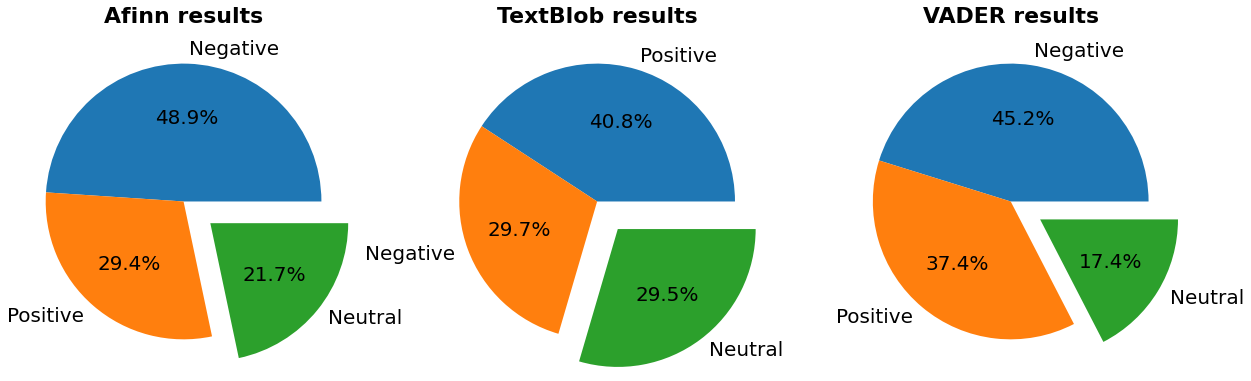

In [124]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.figure(figsize=(21,10))
plt.subplot(1,3,1)
plt.title("Afinn results", fontsize=22, fontweight="bold")
plt.pie(afinn_counts.values, labels = afinn_counts.index, explode = (0, 0, 0.25), autopct='%1.1f%%', textprops={'fontsize': 20}, shadow = False)
plt.subplot(1,3,2)
plt.title("TextBlob results", fontsize=22, fontweight="bold")
plt.pie(textblob_counts.values, labels = textblob_counts.index, explode = (0, 0, 0.25), autopct='%1.1f%%', textprops={'fontsize': 20}, shadow = False)
plt.subplot(1,3,3)
plt.title("VADER results", fontsize=22, fontweight="bold")
plt.pie(vader_counts.values, labels = vader_counts.index, explode = (0, 0, 0.25), autopct='%1.1f%%', textprops={'fontsize': 20}, shadow = False)
plt.savefig("porownanie_calosc.pdf", dpi=300, bbox_inches='tight')

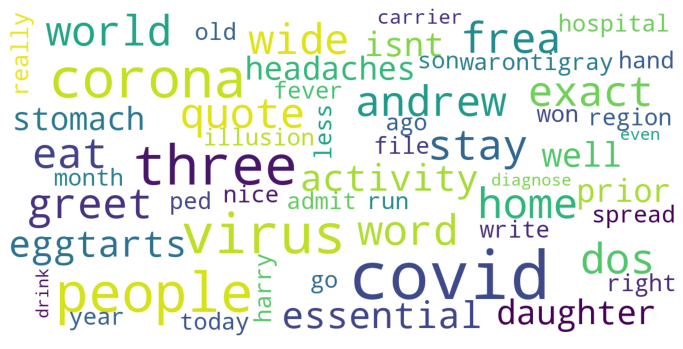

In [40]:
#stworzenie własnych stopwords, które nie będą uwzględniane w wizualizacji
customStopwords=list(STOPWORDS)+ ['dtype', 'la', 'btc', 'c', 's', 'th', 'cra', 'y', 'dr', 'yr', 'Lemma', 've', 'gu', 'p', 'object', 'joor', 'na', 't', 'n', 'per', 'joan', 'itv', 'sinc', 'oh', 'gmt', 'yrs', 'name', 'pre', 'don','length', 'yro', 'daniel']

def show_wordcloud(data):
    wordcloud = WordCloud(
        collocations=False, # nie uwzględnia kolokacji (bigramy) dwóch słów
        background_color='white', #kolor tła
        stopwords=customStopwords, #słowa które nie będą brane pod uwagę
        max_words=200, # mksymalna liczba słów
        max_font_size=40,  #rozmiar czcionki
        scale=3 #skalowanie między obliczeniami a rysowaniem
    ).generate(str(data))

    fig = plt.figure(1, figsize=(12, 12))
    plt.axis('off')

    plt.imshow(wordcloud)
    plt.show()
show_wordcloud(tweet['Lemma'])


In [9]:
#ilość tweetów w poszczególnych dniach
tweet_per_day = tweet['date'].value_counts().sort_index()
#ile najwiecej tweetow 
tweet_per_day_count = tweet['date'].value_counts()
tweet_per_day_count

2020-03-12    98897
2020-03-13    75154
2020-03-16    46554
2020-03-17    46523
2020-03-11    43980
              ...  
2019-12-31        1
2019-12-30        1
2019-12-29        1
2019-12-19        1
2019-12-15        1
Name: date, Length: 815, dtype: int64

In [10]:
#ilość tweetów w poszczególnych dniach
tweet_per_hour = tweet['time'].value_counts().sort_index()
#ile najwiecej tweetow 
tweet_per_hour_count = tweet['time'].value_counts()
tweet_per_hour_count

17:00    3544
16:00    3167
17:05    3138
16:25    3086
16:15    3071
         ... 
06:39    1406
08:54    1404
09:41    1395
09:57    1382
07:28    1378
Name: time, Length: 1440, dtype: int64

In [11]:
sma5_tweet_per_hour = tweet_per_hour.rolling(window=20).mean() #średnia krocząca 
sma5_tweet_per_hour

00:00        NaN
00:01        NaN
00:02        NaN
00:03        NaN
00:04        NaN
          ...   
23:55    1861.10
23:56    1843.10
23:57    1842.65
23:58    1831.15
23:59    1820.85
Name: time, Length: 1440, dtype: float64

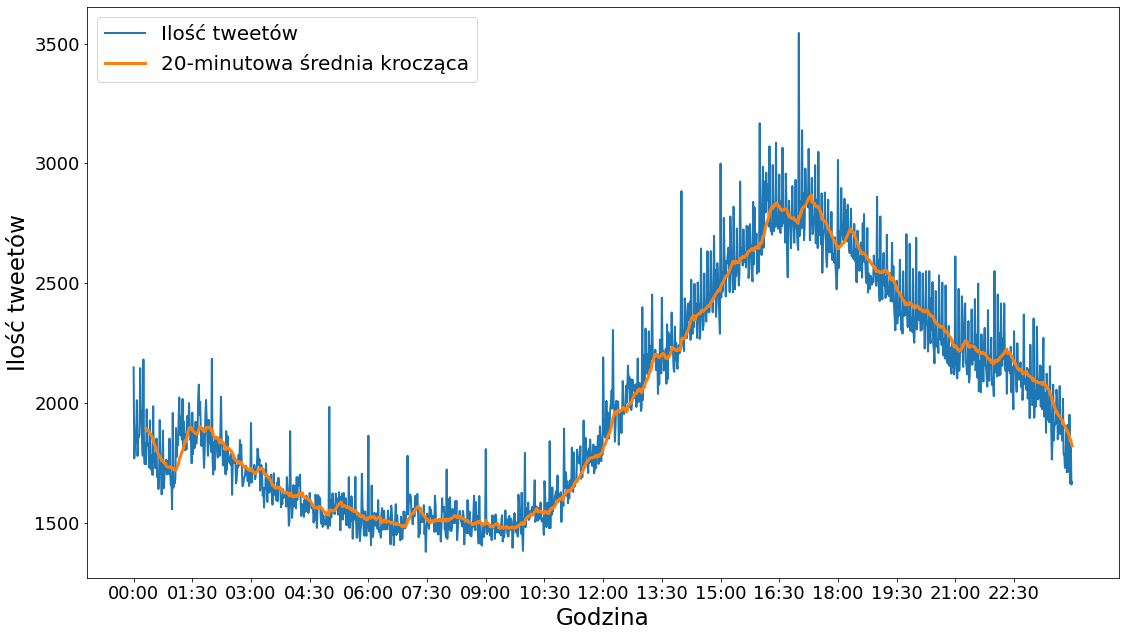

In [11]:
plt.figure(figsize = (18.5, 10.5)) # wielość wykresu
plt.plot(tweet_per_hour, label='Ilość tweetów', linewidth = 2) 
plt.plot(sma5_tweet_per_hour, label='20-minutowa średnia krocząca', linewidth = 3) #dodanie średniej kroczącej, wielkosc lini 3
ax = plt.gca() #uzyskanie aktualnej osi x
ax.set_xticks(ax.get_xticks()[::90]) #wyświetlenie co 50 etykiety
plt.xlabel('Godzina', fontsize=23) #nazwanie osi x
plt.ylabel('Ilość tweetów', fontsize=23) #nazwanie osi y
plt.legend(prop={"size":20}) #legenda
plt.tick_params(axis='both', labelsize=18)
plt.savefig("najpopularniejsze_godziny.pdf", bbox_inches='tight')
plt.show() #pokazanie wykresu

# Lockdown

In [8]:
#tweety zawierajace słowo lockdown
lockdown = tweet[tweet['Text'].str.contains('lockdown')]

In [13]:
lockdown

,TweetID,Text,UserID,likeCount,lang,hastags,coordinates,place,date,time,CleanedText,Tokenize,POS_tagged,Lemma,Textblob_Polarity,Textblob_Analysis,Vader_Sentiment,Vader_Analysis,Afinn_Sentiment,Afinn_Analysis
2,1509680355392978947,"Greeting,people! Eating eggtarts is a essential activity of lockdown life in order to not go crazy during covid time, Mum once told me a story: Alex, who is a nurse, they saved a village from the deadly virus, and they took care of people who got sick",1429571873780637700,0,en,NaN,NaN,NaN,2022-03-31,23:53,greeting people eating eggtarts is a essential activity of lockdown life in order to not go crazy during covid time mum once told me a story alex who is a nurse they saved a village from the deadly virus and they took care of people who got sick,"['greeting', 'people', 'eating', 'eggtarts', 'is', 'a', 'essential', 'activity', 'of', 'lockdown', 'life', 'in', 'order', 'to', 'not', 'go', 'crazy', 'during', 'covid', 'time', 'mum', 'once', 'told', 'me', 'a', 'story', 'alex', 'who', 'is', 'a', 'nurse', 'they', 'saved', 'a', 'village', 'from', 'the', 'deadly', 'virus', 'and', 'they', 'took', 'care', 'of', 'people', 'who', 'got', 'sick']","[('greeting', 'v'), ('people', 'n'), ('eating', 'v'), ('eggtarts', 'n'), ('essential', 'a'), ('activity', 'n'), ('lockdown', 'a'), ('life', 'n'), ('order', 'n'), ('go', 'v'), ('crazy', 'a'), ('covid', 'a'), ('time', 'n'), ('mum', 'n'), ('told', 'v'), ('story', 'n'), ('alex', 'n'), ('nurse', 'n'), ('saved', 'v'), ('village', 'n'), ('deadly', 'a'), ('virus', 'n'), ('took', 'v'), ('care', 'n'), ('people', 'n'), ('got', 'v'), ('sick', 'a')]",greet people eat eggtarts essential activity lockdown life order go crazy covid time mum tell story alex nurse save village deadly virus take care people get sick,-0.378571,Negative,0.4588,Positive,-2.0,Negative
61,1509619869343367178,"Howdy,local cluster! Procrastinating is a ideal habit of lockdown life in order to not go crazy during covid time, My human once told me a story: Charlie, who is a nurse, they saved a village from the virus,, and they took care of people in the village",1429571873780637700,0,en,NaN,NaN,NaN,2022-03-31,19:53,howdy local cluster procrastinating is a ideal habit of lockdown life in order to not go crazy during covid time my human once told me a story charlie who is a nurse they saved a village from the virus and they took care of people in the village,"['howdy', 'local', 'cluster', 'procrastinating', 'is', 'a', 'ideal', 'habit', 'of', 'lockdown', 'life', 'in', 'order', 'to', 'not', 'go', 'crazy', 'during', 'covid', 'time', 'my', 'human', 'once', 'told', 'me', 'a', 'story', 'charlie', 'who', 'is', 'a', 'nurse', 'they', 'saved', 'a', 'village', 'from', 'the', 'virus', 'and', 'they', 'took', 'care', 'of', 'people', 'in', 'the', 'village']","[('howdy', 'a'), ('local', 'a'), ('cluster', 'n'), ('procrastinating', 'n'), ('ideal', 'a'), ('habit', 'n'), ('lockdown', 'a'), ('life', 'n'), ('order', 'n'), ('go', 'v'), ('crazy', 'a'), ('covid', 'a'), ('time', 'n'), ('human', 'a'), ('told', 'v'), ('story', 'n'), ('charlie', 'n'), ('nurse', 'n'), ('saved', 'v'), ('village', 'n'), ('virus', 'n'), ('took', 'v'), ('care', 'n'), ('people', 'n'), ('village', 'n')]",howdy local cluster procrastinating ideal habit lockdown life order go crazy covid time human tell story charlie nurse save village virus take care people village,0.075000,Positive,0.8126,Positive,2.0,Positive
110,1509580500746133531,Govt of Maharashtra has lifted restrictions on COVID stated masks optional But at the same time many Asian Countries facing serious lockdown because of new variant of virus.\n\n**Common People Confused**\n\n#Maharashtra,222981184,1,en,['Maharashtra'],NaN,NaN,2022-03-31,17:16,govt of maharashtra has lifted restrictions on covid stated masks optional but at the same time many asian countries facing serious lockdown because of new variant of virus common people confused maharashtra,"['govt', 'of', 'maharashtra', 'has', 'lifted', 'restrictions'

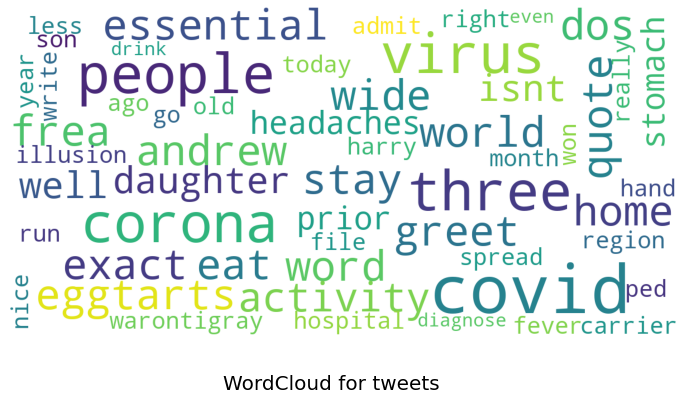

In [19]:
#chmura słów dla lockdown
#stworzenie własnych stopwords, które nie będą uwzględniane w wizualizacji
customStopwords=list(STOPWORDS)+ ['dtype', 'la', 'btc', 'c', 's', 'th', 'cra', 'y', 'dr', 'yr', 'Lemma', 've', 'gu', 'p', 'object', 'joor', 'na', 't', 'n', 'per', 'joan', 'itv', 'sinc', 'oh', 'gmt', 'yrs', 'name', 'pre', 'don','length', 'yro', 'daniel']

def show_wordcloud(data, title = None):
    wordcloud = WordCloud(
        collocations=False, # nie uwzględnia kolokacji (bigramy) dwóch słów
        background_color='white', #kolor tła
        stopwords=customStopwords, #słowa które nie będą brane pod uwagę
        max_words=200, # mksymalna liczba słów
        max_font_size=40,  #rozmiar czcionki
        scale=3 #skalowanie między obliczeniami a rysowaniem
    ).generate(str(data))

    fig = plt.figure(1, figsize=(12, 12))
    plt.axis('off')
    if title: 
        fig.suptitle(title, fontsize=20, color = 'black')
        fig.subplots_adjust(top=2.3)

    plt.imshow(wordcloud)
    plt.savefig("chmura_lockdown.pdf")
    plt.show()
    
show_wordcloud(tweet['Lemma'], "WordCloud for tweets")

In [102]:
textblob_lockdown = lockdown.Textblob_Analysis.value_counts()
textblob_lockdown

Positive    24820
Negative    17305
Neutral     12202
Name: Textblob_Analysis, dtype: int64

In [103]:
vader_lockdown = lockdown.Vader_Analysis.value_counts()
vader_lockdown

Negative    25361
Positive    21576
Neutral      7390
Name: Vader_Analysis, dtype: int64

In [104]:
afinn_lockdown = lockdown.Afinn_Analysis.value_counts()
afinn_lockdown

Negative    27240
Positive    17009
Neutral     10078
Name: Afinn_Analysis, dtype: int64

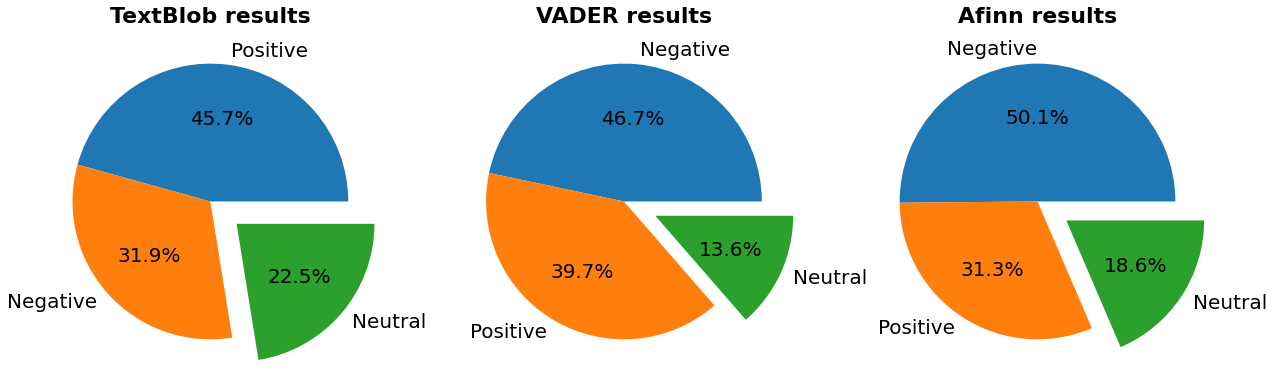

In [105]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.figure(figsize=(21,10))
plt.subplot(1,3,1)
plt.title("TextBlob results", fontsize=22, fontweight="bold")
plt.pie(textblob_lockdown.values, labels = textblob_lockdown.index, explode = (0, 0, 0.25), autopct='%1.1f%%', textprops={'fontsize': 20}, shadow = False)
plt.subplot(1,3,2)
plt.title("VADER results", fontsize=22, fontweight="bold")
plt.pie(vader_lockdown.values, labels = vader_lockdown.index, explode = (0, 0, 0.25), autopct='%1.1f%%', textprops={'fontsize': 20}, shadow = False)
plt.subplot(1,3,3)
plt.title("Afinn results", fontsize=22, fontweight="bold")
plt.pie(afinn_lockdown.values, labels = afinn_lockdown.index, explode = (0, 0, 0.25), autopct='%1.1f%%', textprops={'fontsize': 20}, shadow = False)
plt.savefig("all_Lockdown_porownanie.pdf", dpi=300, bbox_inches='tight')

## AFINN

In [9]:
#średni wydzwięk uzyskany z Afinn
grouped_mean_Afinn = lockdown.groupby('date')['Afinn_Sentiment'].mean()
sma10_Afinn = grouped_mean_Afinn.rolling(window=10).mean() #średnia krocząca z 10 dni
sma10_Afinn

date
2020-01-22         NaN
2020-01-23         NaN
2020-01-24         NaN
2020-01-25         NaN
2020-01-26         NaN
                ...   
2022-03-27   -1.287560
2022-03-28   -1.338329
2022-03-29   -1.415601
2022-03-30   -1.338816
2022-03-31   -1.331673
Name: Afinn_Sentiment, Length: 800, dtype: float64

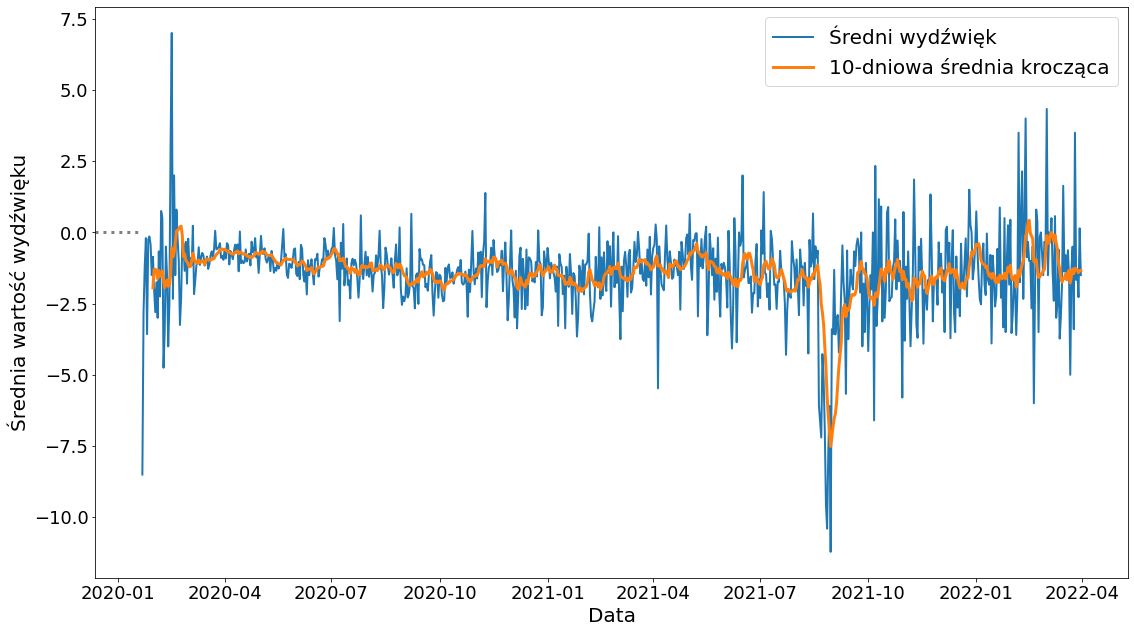

In [10]:
plt.figure(figsize = (18.5, 10.5)) # wielość wykresu

plt.plot(grouped_mean_Afinn, label='Średni wydźwięk', linewidth = 2) 
plt.plot(sma10_Afinn, label='10-dniowa średnia krocząca', linewidth = 3) #dodanie średniej kroczącej, wielkosc lini 3
ax = plt.gca() #uzyskanie aktualnej osi x
ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m'))
plt.xlabel('Data', fontsize=20) #nazwanie osi x
plt.ylabel('Średnia wartość wydźwięku', fontsize=20) #nazwanie osi y
plt.legend(prop={"size":20}) #legenda
plt.tick_params(axis='both', labelsize=18)
plt.axhline(y=0, xmax=0.045, linestyle='dotted', linewidth= 3, color='gray')
plt.savefig("AFINN_lockdown_.pdf", bbox_inches='tight')
plt.show() #pokazanie wykresu

## TextBlob

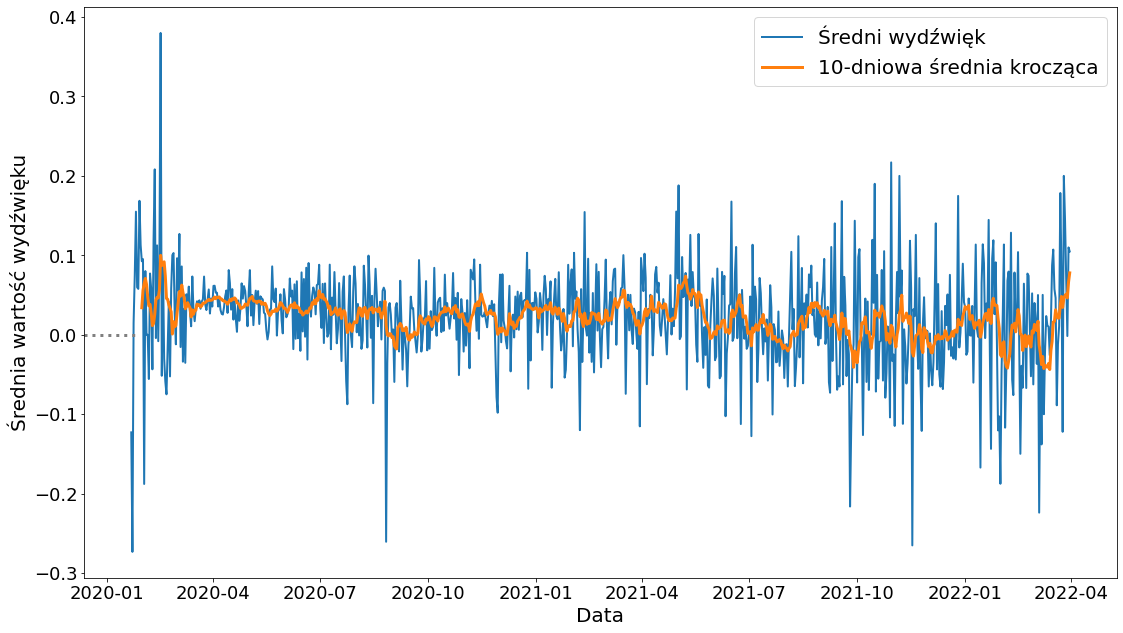

In [11]:
#średni wydzwięk uzyskany z TextBlob
grouped_mean_TextBlob = lockdown.groupby('date')['Textblob_Polarity'].mean()
sma10_TextBlob = grouped_mean_TextBlob.rolling(window=10).mean() #średnia krocząca z 10 dni

plt.figure(figsize = (18.5, 10.5)) # wielość wykresu
plt.plot(grouped_mean_TextBlob, label='Średni wydźwięk', linewidth = 2) 
plt.plot(sma10_TextBlob, label='10-dniowa średnia krocząca', linewidth = 3) #dodanie średniej kroczącej, wielkosc lini 3
ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m'))
plt.xlabel('Data', fontsize=20) #nazwanie osi x
plt.ylabel('Średnia wartość wydźwięku', fontsize=20) #nazwanie osi y
plt.legend(prop={"size":20}) #legenda
plt.tick_params(axis='both', labelsize=18)
plt.axhline(y=0., xmax=0.05, linestyle='dotted', linewidth= 3, color='gray')
plt.savefig("TextBlob_lockdown_.pdf", bbox_inches='tight')
plt.show() #pokazanie wykresu

## VADER

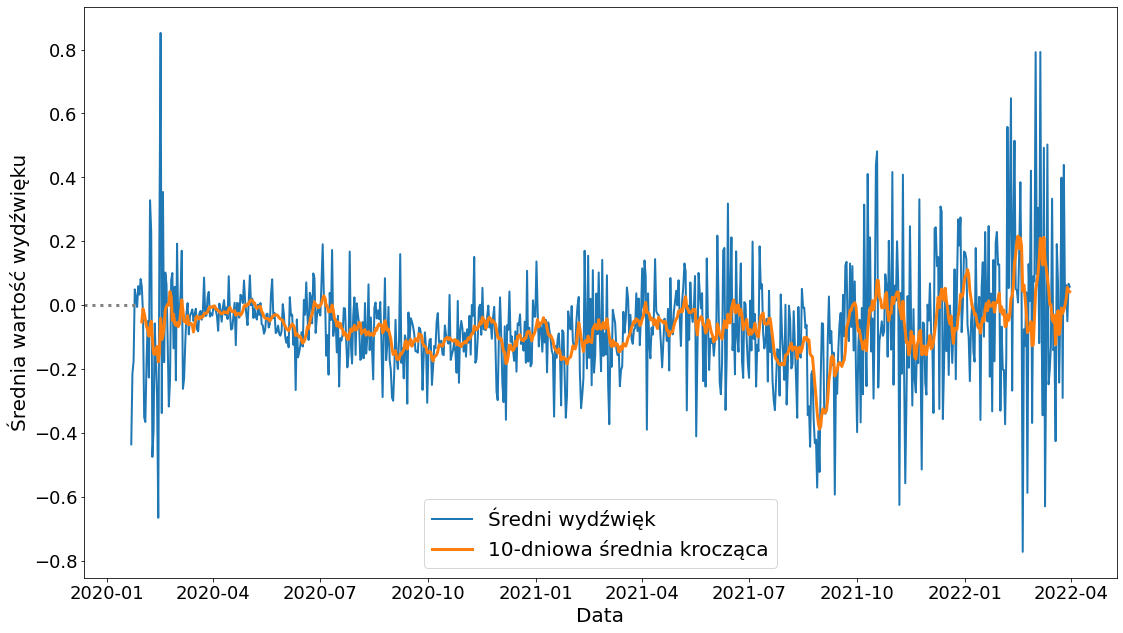

In [12]:
#średni wydzwięk uzyskany z VADER
grouped_mean_Vader = lockdown.groupby('date')['Vader_Sentiment'].mean()
sma10_Vader = grouped_mean_Vader.rolling(window=10).mean() #średnia krocząca z 10 dni

plt.figure(figsize = (18.5, 10.5)) # wielość wykresu
plt.plot(grouped_mean_Vader, label='Średni wydźwięk', linewidth = 2) 
plt.plot(sma10_Vader, label='10-dniowa średnia krocząca', linewidth = 3) #dodanie średniej kroczącej, wielkosc lini 3
ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m'))
plt.xlabel('Data', fontsize=20) #nazwanie osi x
plt.ylabel('Średnia wartość wydźwięku', fontsize=20) #nazwanie osi y
plt.legend(prop={"size":20}) #legenda
plt.tick_params(axis='both', labelsize=18)
plt.axhline(y=0, xmax=0.05, linestyle='dotted', linewidth= 3, color='gray')
plt.savefig("VADER_lockdown_.pdf", bbox_inches='tight')
plt.show() #pokazanie wykresu

# Szczepienia

In [13]:
#tweety zawierające słowo vaccine
vaccine = tweet[tweet['Text'].str.contains('vaccine')]
vaccine


,TweetID,Text,UserID,likeCount,lang,hastags,coordinates,place,date,time,CleanedText,Tokenize,POS_tagged,Lemma,Textblob_Polarity,Textblob_Analysis,Vader_Sentiment,Vader_Analysis,Afinn_Sentiment,Afinn_Analysis
16,1509664902859747347,The world won't strive for Corona Virus vaccine without worry.,1232373728761319426,0,en,NaN,NaN,NaN,2022-03-31,22:52,the world won't strive for corona virus vaccine without worry,"['the', 'world', ""won't"", 'strive', 'for', 'corona', 'virus', 'vaccine', 'without', 'worry']","[('world', 'n'), ('strive', 'n'), ('corona', 'a'), ('virus', 'n'), ('vaccine', 'n'), ('without', None), ('worry', 'n')]",world strive corona virus vaccine without worry,0.000000,Neutral,0.3412,Positive,-3.0,Negative
22,1509662340878200845,You might want to explore Corona Virus vaccine forever.,1232373728761319426,0,en,NaN,NaN,NaN,2022-03-31,22:42,you might want to explore corona virus vaccine forever,"['you', 'might', 'want', 'to', 'explore', 'corona', 'virus', 'vaccine', 'forever']","[('might', None), ('want', 'v'), ('explore', 'v'), ('corona', 'a'), ('virus', 'n'), ('vaccine', 'n'), ('forever', 'n')]",might want explore corona virus vaccine forever,0.000000,Neutral,0.0772,Positive,1.0,Positive
34,1509639231106433033,And the Covid 19 vaccine stops transmission and protects from catching the virus? Pull the other leg while you are at it.,1488263593657315328,1,en,NaN,NaN,NaN,2022-03-31,21:10,and the covid vaccine stops transmission and protects from catching the virus pull the other leg while you are at it,"['and', 'the', 'covid', 'vaccine', 'stops', 'transmission', 'and', 'protects', 'from', 'catching', 'the', 'virus', 'pull', 'the', 'other', 'leg', 'while', 'you', 'are', 'at', 'it']","[('covid', 'a'), ('vaccine', 'n'), ('stops', 'v'), ('transmission', 'n'), ('protects', 'n'), ('catching', 'v'), ('virus', 'n'), ('pull', 'v'), ('leg', 'n')]",covid vaccine stop transmission protects catch virus pull leg,0.000000,Neutral,0.0258,Neutral,0.0,Neutral
49,1509629821181374464,"It’s ridiculous how this COVID vaccine is yea just last month 3 of my colleagues got their 3rd booster dose, just today this morning they tested positive 🤦🏿‍♂️ God save us from this deadly virus shit almost took my life last year.",124834525,1,en,NaN,NaN,NaN,2022-03-31,20:32,it’s ridiculous how this covid vaccine is yea just last month of my colleagues got their rd booster dose just today this morning they tested positive god save us from this deadly virus shit almost took my life last year,"['it’s', 'ridiculous', 'how', 'this', 'covid', 'vaccine', 'is', 'yea', 'just', 'last', 'month', 'of', 'my', 'colleagues', 'got', 'their', 'rd', 'booster', 'dose', 'just', 'today', 'this', 'morning', 'they', 'tested', 'positive', 'god', 'save', 'us', 'from', 'this', 'deadly', 'virus', 'shit', 'almost', 'took', 'my', 'life', 'last', 'year']","[('it’s', 'r'), ('ridiculous', 'a'), ('covid', 'a'), ('vaccine', 'n'), ('yea', 'r'), ('last', 'a'), ('month', 'n'), ('colleagues', 'n'), ('got', 'v'), ('rd', 'n'), ('booster', 'n'), ('dose', 'n'), ('today', 'n'), ('morning', 'n'), ('tested', 'v'), ('positive', 'a'), ('god', 'n'), ('save', 'v'), ('us', None), ('deadly', 'a'), ('virus', 'n'), ('shit', 'v'), ('almost', 'r'), ('took', 'v'), ('life', 'n'), ('last', 'a'), ('year', 'n')]",it’s ridiculous covid vaccine yea last month colleague get rd booster dose today morning test positive god save us deadly virus shit almost take life last year,-0.084343,Negative,0.4215,Positive,-5.0,Negative
50,1509629365377646597,"We have friend who was against the covid vaccines. For about a year &amp; a half during worst covid times, he was ok but then he got the virus. He’s all jacked up now. Walks like a zombie now. Has several health conditions now. We warned him. #TooLateBro",1454709359460638725,0,en,['TooLateBro'],NaN,NaN,2022-03-31,20:31,we have friend who was against the covid vaccines for about a year amp a half during worst covid times he was ok but then he got the virus he’s all jacked up now walks l

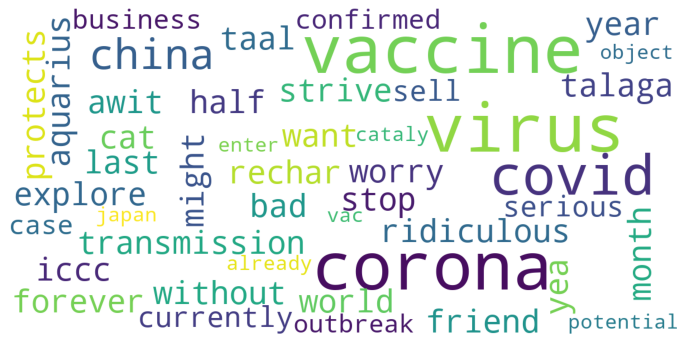

In [7]:
#chmura słów dla vaccine

#chmura słów dla vaccine
#stworzenie własnych stopwords, które nie będą uwzględniane w wizualizacji
customStopwords=list(STOPWORDS)+ ['dtype', 'dos', 'ng', 'ani', 'ng', 'szn', 'm', 'amp', 'btc', 'dr', 'Lemma', 'gu', 'na', 'per', 'oh', 's', 'daniel', 'length', 'name']

def show_wordcloud(data):
    wordcloud = WordCloud(
        collocations=False, # nie uwzględnia kolokacji (bigramy) dwóch słów
        background_color='white', #kolor tła
        stopwords=customStopwords, #słowa które nie będą brane pod uwagę
        max_words=300, # mksymalna liczba słów
        max_font_size=40,  #rozmiar czcionki
        scale=3 #skalowanie między obliczeniami a rysowaniem
    ).generate(str(data))

    fig = plt.figure(1, figsize=(12, 12))
    plt.axis('off')


    plt.imshow(wordcloud)
    plt.savefig("chmura_szczepienia1.pdf", dpi=300, bbox_inches='tight')
    plt.show()

show_wordcloud(vaccine['Lemma'])

In [10]:
textblob_vaccine = vaccine.Textblob_Analysis.value_counts()
textblob_vaccine

Positive    52130
Neutral     34554
Negative    31115
Name: Textblob_Analysis, dtype: int64

In [11]:
vader_vaccine = vaccine.Vader_Analysis.value_counts()
vader_vaccine

Positive    52990
Negative    45009
Neutral     19800
Name: Vader_Analysis, dtype: int64

In [12]:
afinn_vaccine = vaccine.Afinn_Analysis.value_counts()
afinn_vaccine

Negative    53418
Positive    40007
Neutral     24374
Name: Afinn_Analysis, dtype: int64

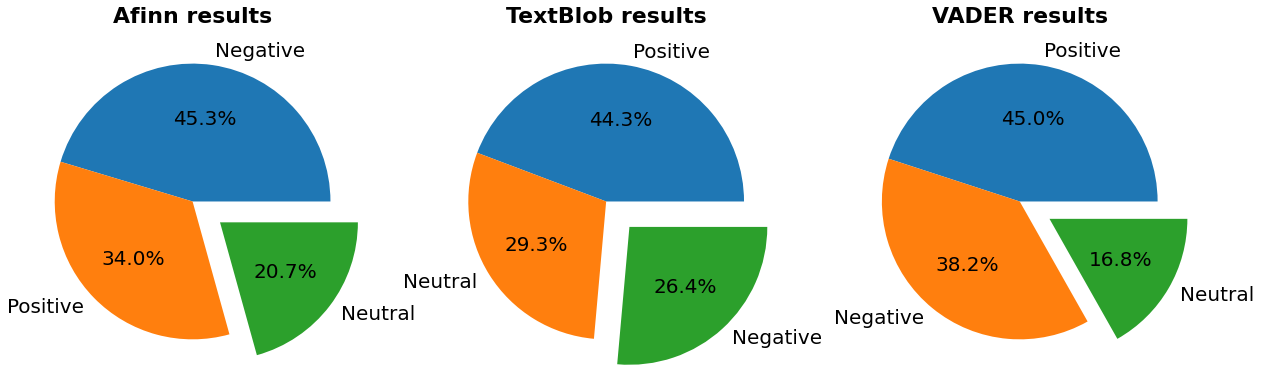

In [16]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.figure(figsize=(21,10))
plt.subplot(1,3,1)
plt.title("Afinn results", fontsize=22, fontweight="bold")
plt.pie(afinn_vaccine.values, labels = afinn_vaccine.index, explode = (0, 0, 0.25), autopct='%1.1f%%', textprops={'fontsize': 20}, shadow = False)
plt.subplot(1,3,2)
plt.title("TextBlob results", fontsize=22, fontweight="bold")
plt.pie(textblob_vaccine.values, labels = textblob_vaccine.index, explode = (0, 0, 0.25), autopct='%1.1f%%', textprops={'fontsize': 20}, shadow = False)
plt.subplot(1,3,3)
plt.title("VADER results", fontsize=22, fontweight="bold")
plt.pie(vader_vaccine.values, labels = vader_vaccine.index, explode = (0, 0, 0.25), autopct='%1.1f%%', textprops={'fontsize': 20}, shadow = False)
plt.savefig("all_vaccine_porownanie.pdf", bbox_inches='tight')

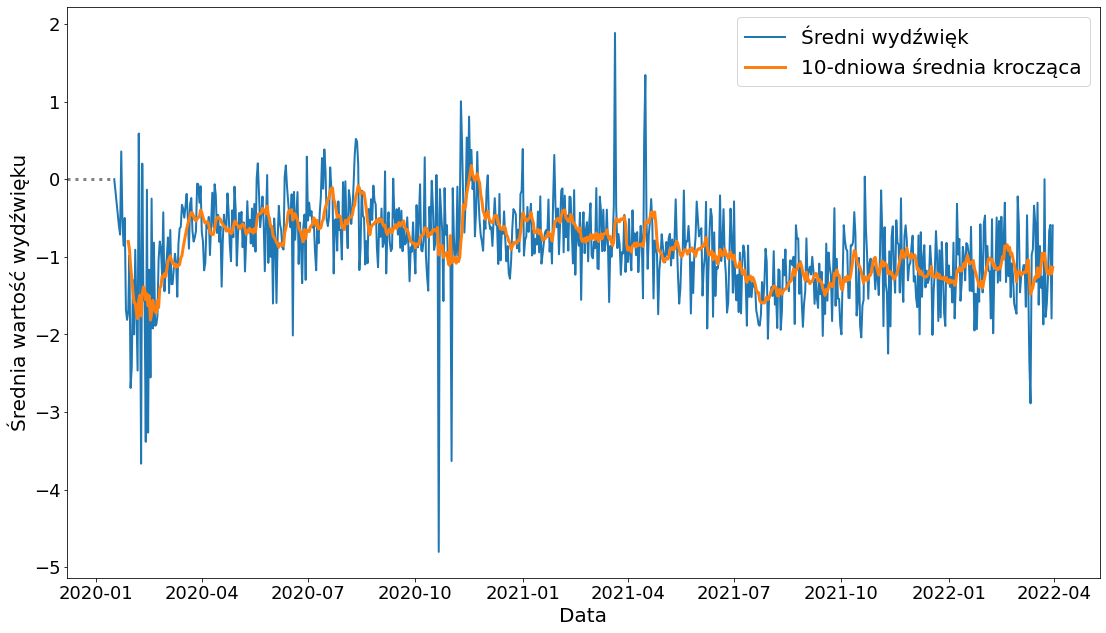

In [15]:
#średni wydzwięk uzyskany z Afinn
grouped_mean_Afinn = vaccine.groupby('date')['Afinn_Sentiment'].mean()
sma10_Afinn = grouped_mean_Afinn.rolling(window=10).mean() #średnia krocząca z 10 dni


plt.figure(figsize = (18.5, 10.5)) # wielość wykresu
plt.plot(grouped_mean_Afinn, label='Średni wydźwięk', linewidth = 2) 
plt.plot(sma10_Afinn, label='10-dniowa średnia krocząca', linewidth = 3) #dodanie średniej kroczącej, wielkosc lini 3
ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m'))
plt.xlabel('Data', fontsize=20) #nazwanie osi x
plt.ylabel('Średnia wartość wydźwięku', fontsize=20) #nazwanie osi y
plt.legend(prop={"size":20}) #legenda
plt.tick_params(axis='both', labelsize=18)
plt.axhline(y=0, xmax=0.045, linestyle='dotted', linewidth= 3, color='gray')
plt.savefig("AFINN_vaccine.pdf", bbox_inches='tight')
plt.show() #pokazanie wykresu

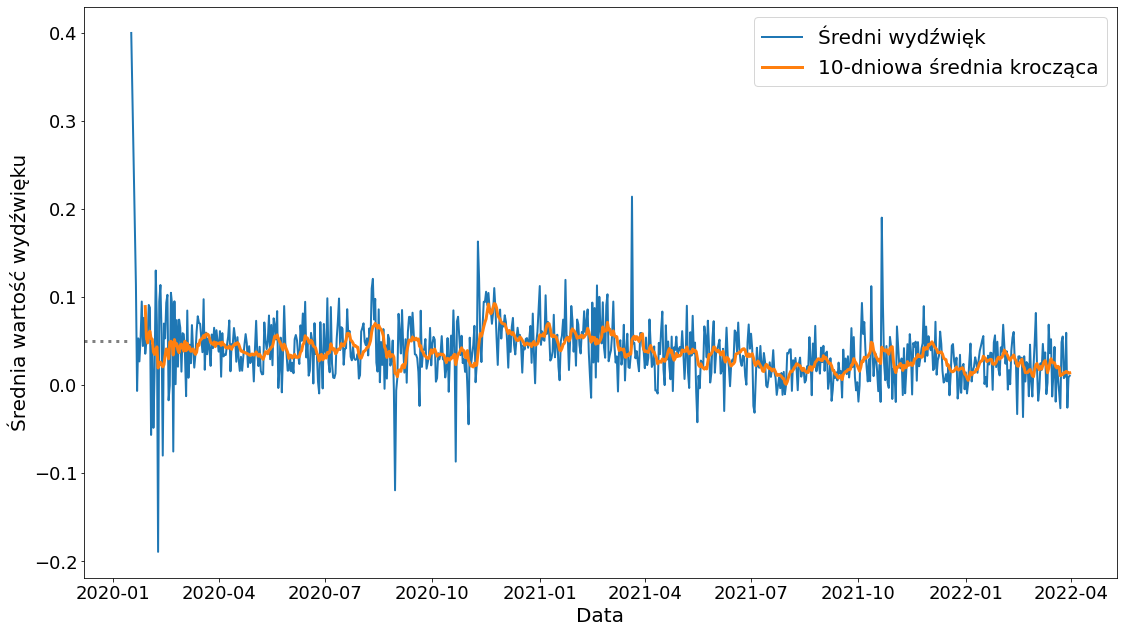

In [16]:
#średni wydzwięk uzyskany z TextBlob
grouped_mean_TextBlob = vaccine.groupby('date')['Textblob_Polarity'].mean()
sma10_TextBlob = grouped_mean_TextBlob.rolling(window=10).mean() #średnia krocząca z 10 dni

plt.figure(figsize = (18.5, 10.5)) # wielość wykresu
plt.plot(grouped_mean_TextBlob, label='Średni wydźwięk', linewidth = 2) 
plt.plot(sma10_TextBlob, label='10-dniowa średnia krocząca', linewidth = 3) #dodanie średniej kroczącej, wielkosc lini 3
ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m'))
plt.xlabel('Data', fontsize=20) #nazwanie osi x
plt.ylabel('Średnia wartość wydźwięku', fontsize=20) #nazwanie osi y
plt.legend(prop={"size":20}) #legenda
plt.tick_params(axis='both', labelsize=18)
plt.axhline(y=0.05, xmax=0.045, linestyle='dotted', linewidth= 3, color='gray')
plt.savefig("TextBlob_vaccine.pdf", bbox_inches='tight')
plt.show() #pokazanie wykresu

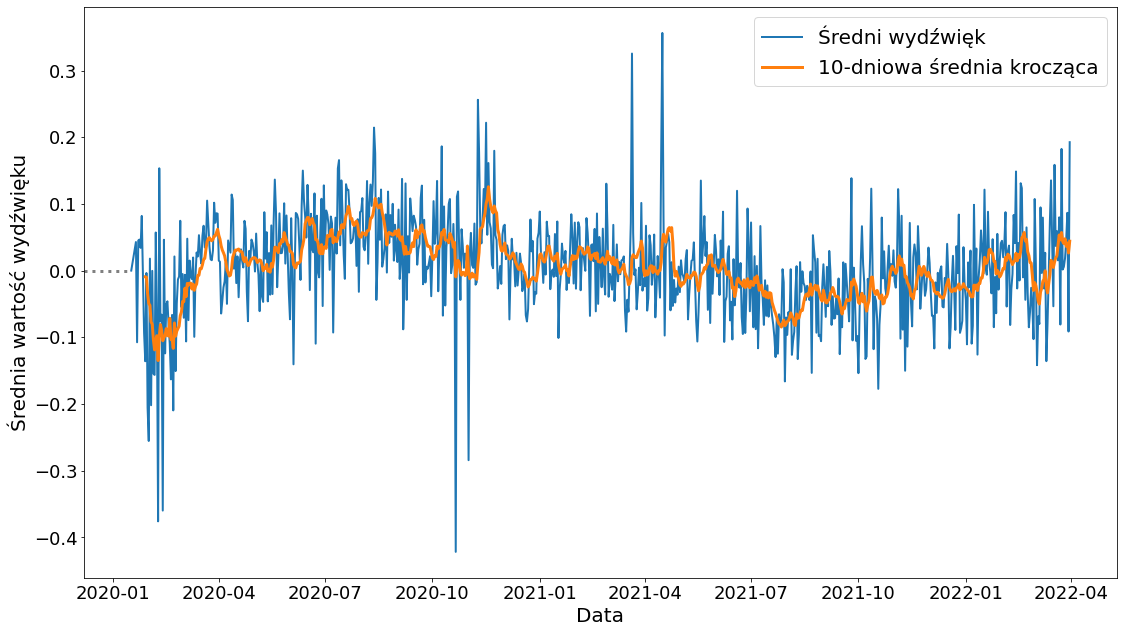

In [17]:
#średni wydzwięk uzyskany z VADER
grouped_mean_Vader = vaccine.groupby('date')['Vader_Sentiment'].mean()
sma10_Vader = grouped_mean_Vader.rolling(window=10).mean() #średnia krocząca z 10 dni

plt.figure(figsize = (18.5, 10.5)) # wielość wykresu
plt.plot(grouped_mean_Vader, label='Średni wydźwięk', linewidth = 2) 
plt.plot(sma10_Vader, label='10-dniowa średnia krocząca', linewidth = 3) #dodanie średniej kroczącej, wielkosc lini 3
ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m'))
plt.xlabel('Data', fontsize=20) #nazwanie osi x
plt.ylabel('Średnia wartość wydźwięku', fontsize=20) #nazwanie osi y
plt.legend(prop={"size":20}) #legenda
plt.tick_params(axis='both', labelsize=18)
plt.axhline(y=0, xmax=0.045, linestyle='dotted', linewidth= 3, color='gray')
plt.savefig("VADER_vaccine.pdf", bbox_inches='tight')
plt.show() #pokazanie wykresu

# Użytkownik z największą ilością tweetów

In [12]:
#ilość tweetów dla każdego użytkownika
tweet['UserID'].value_counts()

1226269697387053056    23633
1236273574895329281    18070
1232373728761319426    10195
1247152787843977218     8895
976098246882885634      8037
                       ...  
168444234                  1
1109896734812061697        1
864285539083722752         1
914157580620091392         1
814585147819524096         1
Name: UserID, Length: 1587261, dtype: int64

In [13]:
#wybór użytkownika który najwięcej tweetował
firstUser = tweet[tweet.UserID == 1226269697387053056]

In [14]:
afinn_counts = firstUser.Afinn_Analysis.value_counts()
afinn_counts

Negative    23633
Name: Afinn_Analysis, dtype: int64

In [15]:
vader_counts = firstUser.Vader_Analysis.value_counts()
vader_counts

Negative    23633
Name: Vader_Analysis, dtype: int64

In [16]:
textblob_counts = firstUser.Textblob_Analysis.value_counts()
textblob_counts

Neutral     22766
Negative      867
Name: Textblob_Analysis, dtype: int64

In [17]:
firstUser

,TweetID,Text,UserID,likeCount,lang,hastags,coordinates,place,date,time,CleanedText,Tokenize,POS_tagged,Lemma,Textblob_Polarity,Textblob_Analysis,Vader_Sentiment,Vader_Analysis,Afinn_Sentiment,Afinn_Analysis
1519,1508126716296048640,"Indonesia Corona virus\nCases : 5,998,953\nDea...",1226269697387053056,0,en,"['covid19', 'covid19update', 'corona', 'corona...",NaN,NaN,2022-03-27,17:00,indonesia corona virus cases death...,"['indonesia', 'corona', 'virus', 'cases', 'dea...","[('indonesia', 'n'), ('corona', 'n'), ('virus'...",indonesia corona virus case death recover da...,0.000000,Neutral,-0.8316,Negative,-4.0,Negative
1794,1507764326874025985,"Spain Corona virus\nCases : 11,451,676\nDeaths...",1226269697387053056,0,en,NaN,NaN,NaN,2022-03-26,17:00,spain corona virus cases deaths ...,"['spain', 'corona', 'virus', 'cases', 'deaths'...","[('spain', 'n'), ('corona', 'n'), ('virus', 'n...",spain corona virus case death recover daily ...,0.000000,Neutral,-0.8316,Negative,-4.0,Negative
1795,1507764325032726529,"Indonesia Corona virus\nCases : 5,995,876\nDea...",1226269697387053056,0,en,"['covid19', 'covid19update', 'corona', 'corona...",NaN,NaN,2022-03-26,17:00,indonesia corona virus cases death...,"['indonesia', 'corona', 'virus', 'cases', 'dea...","[('indonesia', 'n'), ('corona', 'n'), ('virus'...",indonesia corona virus case death recover da...,0.000000,Neutral,-0.8316,Negative,-4.0,Negative
1925,1507583135101652998,"Indonesia Corona virus\nCases : 5,991,687\nDea...",1226269697387053056,0,en,"['covid19', 'covid19update', 'corona', 'corona...",NaN,NaN,2022-03-26,05:00,indonesia corona virus cases death...,"['indonesia', 'corona', 'virus', 'cases', 'dea...","[('indonesia', 'n'), ('corona', 'n'), ('virus'...",indonesia corona virus case death recover da...,0.000000,Neutral,-0.8316,Negative,-4.0,Negative
2456,1507039560500273175,"Indonesia Corona virus\nCases : 5,986,830\nDea...",1226269697387053056,0,en,"['covid19', 'covid19update', 'corona', 'corona...",NaN,NaN,2022-03-24,17:00,indonesia corona virus cases death...,"['indonesia', 'corona', 'virus', 'cases', 'dea...","[('indonesia', 'n'), ('corona', 'n'), ('virus'...",indonesia corona virus case death recover da...,0.000000,Neutral,-0.8316,Negative,-4.0,Negative
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1093090,1253247252736249856,"Indonesia Corona virus\nCases : 7,775\nDeaths ...",1226269697387053056,0,en,"['covid19', 'covid19update', 'corona', 'corona...",NaN,NaN,2020-04-23,09:00,indonesia corona virus cases deaths ...,"['indonesia', 'corona', 'virus', 'cases', 'dea...","[('indonesia', 'n'), ('corona', 'n'), ('virus'...",indonesia corona virus case death recover co...,0.000000,Neutral,-0.5994,Negative,-2.0,Negative
1094190,1253186943577280513,"Word Corona virus\nCases:2,638,477 \nDeaths:18...",1226269697387053056,0,en,NaN,NaN,NaN,2020-04-23,05:00,word corona virus cases deaths ...,"['word', 'corona', 'virus', 'cases', 'deaths',...","[('word', 'n'), ('corona', 'n'), ('virus', 'n'...",word corona virus case death recover active ...,-0.046667,Negative,-0.8271,Negative,-3.0,Negative
1094213,1253185597109231616,"Indonesia Corona virus\nCases : 7,418\nDeaths ...",1226269697387053056,0,en,"['covid19', 'covid19update', 'corona', 'corona...",NaN,NaN,2020-04-23,04:55,indonesia corona virus cases deaths ...,"['indonesia', 'corona', 'virus', 'cases', 'dea...","[('indonesia', 'n'), ('corona', 'n'), ('virus'...",indonesia corona virus case death recover co...,0.000000,Neutral,-0.5994,Negative,-2.0,Negative
1094429,1253171797656170496,"Indonesia Corona virus\nCases : 7,418\nDeaths ...",1226269697387053056,0,en,"['covid19', 'covid19update', 'corona', 'corona...",NaN,NaN,2020-04-23,04:00,indonesia corona virus cases deaths ...,"['indonesia', 'corona', 'virus', 'cases', 'dea...","[('indonesia', 'n'), ('corona', 'n'), ('virus'...",indonesia corona virus case death recover co...,0.000000,Neutral,-0.5994,Negative,-2.0,Negative
